# Initial Setup (install & import all required libraries )

In [234]:
# This code mounts your Google Drive in the Colab environment
# You can access files and directories from your Google Drive account

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Dataset link from Kaggle: **https://www.kaggle.com/datasets/uom190346a/food-ingredients-and-allergens**

In [235]:
path="/content/gdrive/MyDrive/Food Ingredient/food_ingredients_and_allergens.csv"

In [236]:
import pandas as pd
import numpy as np

In [237]:
df=pd.read_csv(path)

# Data Cleaning - replacing the null values, mean values

In [238]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains


In [239]:
df.shape

(409, 7)

In [240]:
sum(df.duplicated())

93

In [241]:
df.drop_duplicates(inplace = True)
df.shape

(316, 7)

In [242]:
df.isna().sum()

Food Product       0
Main Ingredient    1
Sweetener          0
Fat/Oil            1
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

In [243]:
df.dropna(inplace = True)
df.shape

(313, 7)

In [244]:
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Prediction'],
      dtype='object')

In [245]:
for item in list(df.columns):
    print(item , "   " , df[item].nunique())

Food Product     264
Main Ingredient     103
Sweetener     10
Fat/Oil     36
Seasoning     187
Allergens     40
Prediction     2


In [246]:
mask = (df['Allergens'] == 'None') & (df['Prediction'] == 'Contains')
rows_to_drop = df[mask].index
df.drop(rows_to_drop, inplace=True)

In [247]:
rows_to_drop

Int64Index([133, 134, 135, 257, 262], dtype='int64')

In [248]:
df.shape

(308, 7)

In [249]:
df.reset_index(inplace=True)

# Data Normalisation - combining all the features into single column

In [250]:

df['text']=' '+df['Main Ingredient']+' '+df['Sweetener']+' '+df['Fat/Oil']+' '+df['Seasoning']+' '+df['Allergens']

In [251]:
df

,index,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,text
0,0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains,"Almonds Sugar Butter Flour Almonds, Wheat, Dairy"
1,2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains,"Chicken broth None None Salt Chicken, Wheat, ..."
2,4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains,Cheese None None Salt Dairy
3,5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains,"Buttermilk Sugar Vegetable oil Garlic, herbs ..."
4,6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains,Popcorn Sugar Butter Salt Dairy
...,...,...,...,...,...,...,...,...,...
303,399,Bean Salad,Bean,None,Olive oil,spices,None,Does not contain,Bean None Olive oil spices None
304,400,Corn Salad,Corn,None,Olive oil,spices,None,Does not contain,Corn None Olive oil spices None
305,401,Carrots Salad,Carrots,None,Olive oil,spices,None,Does not contain,Carrots None Olive oil spices None
306,402,Peanuts Salad,Peanuts,None,Olive oil,spices,None,Does not contain,Peanuts None Olive oil spices None


In [252]:
df.replace('Vegetable oil', 'VegetableOil', regex=True, inplace=True)
df.replace('Olive oil', 'OliveOil', regex=True, inplace=True)

# Data Preprocessing - removal of puntuation, stop words, case conversion and stemming


In [253]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [254]:
import nltk
nltk.download('stopwords')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [255]:

for index, i in df['text'].iteritems():
  print(i)

 Almonds Sugar Butter Flour Almonds, Wheat, Dairy
 Chicken broth None None Salt Chicken, Wheat, Celery
 Cheese None None Salt Dairy
 Buttermilk Sugar VegetableOil Garlic, herbs Dairy
 Popcorn Sugar Butter Salt Dairy
 Romaine lettuce None OliveOil Parmesan cheese Dairy
 Grilled chicken None Caesar dressing Lettuce, Parmesan cheese Dairy
 Strawberries Honey Yogurt (milk, cultures) None Dairy
 Cheese None None Tomato sauce Dairy
 Cheese None None Tomato sauce, basil Dairy
 Potatoes None Butter Salt, Pepper Dairy
 Yogurt (milk, cultures) None None None Dairy
 Grilled chicken None Caesar dressing Lettuce, Parmesan cheese Dairy
 Tomatoes None OliveOil Mozzarella cheese, basil Dairy
 Mixed berries Sugar Yogurt (milk, cultures) None Dairy
 Romaine lettuce None OliveOil Caesar dressing Dairy
 Mixed berries Sugar Yogurt (milk, cultures) Granola Dairy
 Chicken None Butter Cream, Parmesan cheese Dairy
 Pesto sauce None None Mozzarella cheese, basil Dairy
 Beef None Sour cream Mushroom, onion Dairy

<ipython-input-255-3aad7cacc9d3>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, i in df['text'].iteritems():


In [256]:
for index, i in df['text'].iteritems():
  print(str(i))
  sentence = i.lower()
  sentence=sentence.replace('{html}',"")
  cleanr = re.compile('<.*?>:')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  print(" ".join(filtered_words))
  df['text'].iloc[index] = " ".join(filtered_words)


<ipython-input-256-5971ba85a9b4>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, i in df['text'].iteritems():
<ipython-input-256-5971ba85a9b4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'].iloc[index] = " ".join(filtered_words)


 Almonds Sugar Butter Flour Almonds, Wheat, Dairy
almonds sugar butter flour almonds wheat dairy
 Chicken broth None None Salt Chicken, Wheat, Celery
chicken broth none none salt chicken wheat celery
 Cheese None None Salt Dairy
cheese none none salt dairy
 Buttermilk Sugar VegetableOil Garlic, herbs Dairy
buttermilk sugar vegetableoil garlic herbs dairy
 Popcorn Sugar Butter Salt Dairy
popcorn sugar butter salt dairy
 Romaine lettuce None OliveOil Parmesan cheese Dairy
romaine lettuce none oliveoil parmesan cheese dairy
 Grilled chicken None Caesar dressing Lettuce, Parmesan cheese Dairy
grilled chicken none caesar dressing lettuce parmesan cheese dairy
 Strawberries Honey Yogurt (milk, cultures) None Dairy
strawberries honey yogurt milk cultures none dairy
 Cheese None None Tomato sauce Dairy
cheese none none tomato sauce dairy
 Cheese None None Tomato sauce, basil Dairy
cheese none none tomato sauce basil dairy
 Potatoes None Butter Salt, Pepper Dairy
potatoes none butter salt peppe

In [257]:
df['text']

0         almonds sugar butter flour almonds wheat dairy
1      chicken broth none none salt chicken wheat celery
2                            cheese none none salt dairy
3       buttermilk sugar vegetableoil garlic herbs dairy
4                        popcorn sugar butter salt dairy
                             ...                        
303                       bean none oliveoil spices none
304                       corn none oliveoil spices none
305                    carrots none oliveoil spices none
306                    peanuts none oliveoil spices none
307                       bean none oliveoil spices none
Name: text, Length: 308, dtype: object

In [258]:
df

,index,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,text
0,0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains,almonds sugar butter flour almonds wheat dairy
1,2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains,chicken broth none none salt chicken wheat celery
2,4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains,cheese none none salt dairy
3,5,Ranch Dressing,Buttermilk,Sugar,VegetableOil,"Garlic, herbs",Dairy,Contains,buttermilk sugar vegetableoil garlic herbs dairy
4,6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains,popcorn sugar butter salt dairy
...,...,...,...,...,...,...,...,...,...
303,399,Bean Salad,Bean,None,OliveOil,spices,None,Does not contain,bean none oliveoil spices none
304,400,Corn Salad,Corn,None,OliveOil,spices,None,Does not contain,corn none oliveoil spices none
305,401,Carrots Salad,Carrots,None,OliveOil,spices,None,Does not contain,carrots none oliveoil spices none
306,402,Peanuts Salad,Peanuts,None,OliveOil,spices,None,Does not contain,peanuts none oliveoil spices none


In [259]:
df.describe()

,index
count,308.00000
mean,191.88961
std,116.64683
min,0.00000
25%,91.75000
50%,183.50000
75%,297.50000
max,403.00000


# Assigning target and features

In [260]:
target=df['Prediction']
features=df['text']

# Splitting train and test data

In [261]:
from sklearn.model_selection import train_test_split

features_train , features_test , target_train , target_test = train_test_split(features,target , test_size=0.2 , random_state=23, stratify=target)

# Feature Extraction (Bag of Words and TFIDF Vectorizer)

In [262]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(features_train)
X_test_bow = bow_vectorizer.transform(features_test)

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trainf = vectorizer.fit_transform(features_train)
testf = vectorizer.transform(features_test)

# Random Forest

---



##  TFIDF

In [264]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=15, random_state=0)
ran.fit(trainf, target_train)
y_pred=clf.predict(testf)
from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))

                  precision    recall  f1-score   support

        Contains       1.00      1.00      1.00        39
Does not contain       1.00      1.00      1.00        23

        accuracy                           1.00        62
       macro avg       1.00      1.00      1.00        62
    weighted avg       1.00      1.00      1.00        62



In [265]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

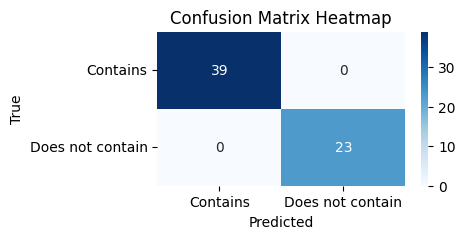

In [266]:
conf_matrix = confusion_matrix(target_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Bag of Words(BoW)

In [267]:
from sklearn.ensemble import RandomForestClassifier
ran_bow = RandomForestClassifier(max_depth=15, random_state=0)
ran_bow.fit(X_train_bow, target_train)
ran_pred_bow=clf.predict(X_test_bow)
from sklearn.metrics import classification_report
print(classification_report(target_test, ran_pred_bow))

                  precision    recall  f1-score   support

        Contains       1.00      0.90      0.95        39
Does not contain       0.85      1.00      0.92        23

        accuracy                           0.94        62
       macro avg       0.93      0.95      0.93        62
    weighted avg       0.95      0.94      0.94        62



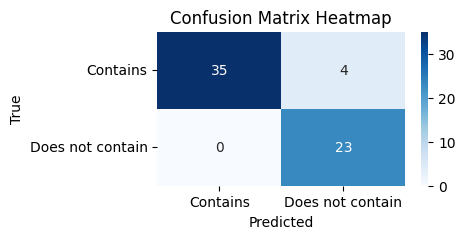

In [268]:
conf_matrix = confusion_matrix(target_test, ran_pred_bow)

# Create a heatmap using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=ran_bow.classes_,
            yticklabels=ran_bow.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


# K Nearest Neighbor

## Bag of Words

In [269]:
from sklearn.neighbors import KNeighborsClassifier
neigh_bow = KNeighborsClassifier(n_neighbors=3)
neigh_bow.fit(X_train_bow, target_train)
neigh_pred_bow=neigh_bow.predict(X_test_bow)
from sklearn.metrics import classification_report
print(classification_report(target_test, neigh_pred_bow))

                  precision    recall  f1-score   support

        Contains       1.00      0.97      0.99        39
Does not contain       0.96      1.00      0.98        23

        accuracy                           0.98        62
       macro avg       0.98      0.99      0.98        62
    weighted avg       0.98      0.98      0.98        62



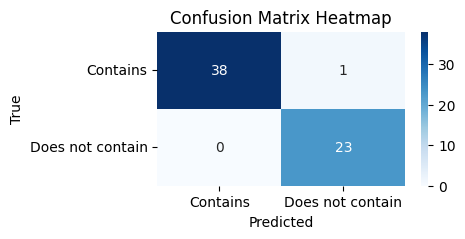

In [270]:
conf_matrix = confusion_matrix(target_test, neigh_pred_bow)

# Create a heatmap using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=neigh_bow.classes_,
            yticklabels=neigh_bow.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


## TF-IDF

In [271]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainf, target_train)
neigh_pred=neigh.predict(testf)
from sklearn.metrics import classification_report
print(classification_report(target_test, neigh_pred))

                  precision    recall  f1-score   support

        Contains       0.97      0.87      0.92        39
Does not contain       0.81      0.96      0.88        23

        accuracy                           0.90        62
       macro avg       0.89      0.91      0.90        62
    weighted avg       0.91      0.90      0.90        62



# Logistic Regression

## TF IDF

In [272]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0).fit(trainf, target_train)
log_pred=log.predict(testf)
from sklearn.metrics import classification_report
print(classification_report(target_test, log_pred))


                  precision    recall  f1-score   support

        Contains       0.97      1.00      0.99        39
Does not contain       1.00      0.96      0.98        23

        accuracy                           0.98        62
       macro avg       0.99      0.98      0.98        62
    weighted avg       0.98      0.98      0.98        62



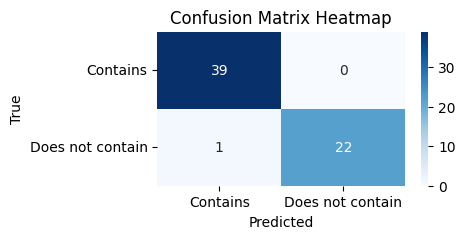

In [273]:
conf_matrix = confusion_matrix(target_test, log_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=log.classes_,
            yticklabels=log.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Bag of Words

In [274]:
from sklearn.linear_model import LogisticRegression
log_bow = LogisticRegression(random_state=0).fit(X_train_bow, target_train)
log_pred_bow=log_bow.predict(X_test_bow)
from sklearn.metrics import classification_report
print(classification_report(target_test, log_pred_bow))


                  precision    recall  f1-score   support

        Contains       1.00      1.00      1.00        39
Does not contain       1.00      1.00      1.00        23

        accuracy                           1.00        62
       macro avg       1.00      1.00      1.00        62
    weighted avg       1.00      1.00      1.00        62



# Naive Bayes

## TF-IDF

In [275]:
from sklearn.naive_bayes import GaussianNB
trainf_dense = trainf.toarray()
testf_dense = testf.toarray()
gnb = GaussianNB()
gnb.fit(trainf_dense, target_train)
y_pred4= gnb.predict(testf_dense)

from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))

                  precision    recall  f1-score   support

        Contains       1.00      1.00      1.00        39
Does not contain       1.00      1.00      1.00        23

        accuracy                           1.00        62
       macro avg       1.00      1.00      1.00        62
    weighted avg       1.00      1.00      1.00        62



## Bag of Words

In [276]:
from sklearn.naive_bayes import GaussianNB
trainf_bow = X_train_bow.toarray()
testf_bow = X_test_bow.toarray()

gnb = GaussianNB()
gnb.fit(trainf_bow, target_train)
y_pred4_bow = gnb.predict(testf_bow)

from sklearn.metrics import classification_report
print(classification_report(target_test, y_pred))

                  precision    recall  f1-score   support

        Contains       1.00      1.00      1.00        39
Does not contain       1.00      1.00      1.00        23

        accuracy                           1.00        62
       macro avg       1.00      1.00      1.00        62
    weighted avg       1.00      1.00      1.00        62



# Optical Character Recognition

In [277]:
pip install easyocr

In [278]:
 import easyocr

In [279]:
image_path = '/content/gdrive/MyDrive/Food Ingredient/image/i1.jpeg'  # Replace 'your_image_path.jpg' with the path to your image
reader = easyocr.Reader(['en'])

In [280]:
result = reader.readtext("/content/gdrive/MyDrive/Food Ingredient/image/i1.jpeg")
print(result)

[([[29, 17], [237, 17], [237, 37], [29, 37]], 'Low FAT VANILLA FLAVOURED YOGHURT', 0.6074412480101483), ([[33, 37], [243, 37], [243, 55], [33, 55]], 'INGREDIENTS: Skim Milk , Concentrated', 0.6106790743927399), ([[33, 51], [237, 51], [237, 72], [33, 72]], 'Skim Wilk, Water; Sugar; Cream (From', 0.6179797558863088), ([[31, 67], [237, 67], [237, 85], [31, 85]], 'Milk) , Thickeners (1422 (Fromn Maize) ,', 0.8332731861006651), ([[33, 83], [139, 83], [139, 101], [33, 101]], '1442 (From Maize))', 0.9351203256894874), ([[143, 85], [205, 85], [205, 101], [143, 101]], 'Milk Solids_', 0.47242193282649775), ([[33, 99], [235, 99], [235, 117], [33, 117]], 'Gelatine; Flavours, Acidity Regulators', 0.8661368156452012), ([[33, 113], [193, 113], [193, 131], [33, 131]], '(331,332,270,330), Enzyme', 0.9344634195352799), ([[33, 131], [165, 131], [165, 147], [33, 147]], '(Lactase) , Live Cultures:', 0.7754419734197697), ([[33, 147], [203, 147], [203, 165], [33, 165]], 'Contains Milk and Milk Products:', 0.

In [281]:
detected_texts = [detection[1] for detection in result]

# Concatenate all the detected texts into a single string
final_result = ", ".join(detected_texts)

# Print the concatenated final result
print(final_result)

Low FAT VANILLA FLAVOURED YOGHURT, INGREDIENTS: Skim Milk , Concentrated, Skim Wilk, Water; Sugar; Cream (From, Milk) , Thickeners (1422 (Fromn Maize) ,, 1442 (From Maize)), Milk Solids_, Gelatine; Flavours, Acidity Regulators, (331,332,270,330), Enzyme, (Lactase) , Live Cultures:, Contains Milk and Milk Products:


In [282]:
STRING = final_result

# Split the string into rows using commas as delimiters
parts = STRING.split(',')
parts = [part.split(';') for part in parts]

# Flatten the list
rows = [item for sublist in parts for item in sublist]

# Now, we will have a list where each string is separated by ',' and '-'
print(rows)

# Create a list to store the data for each row
data = []

# Loop through each row and clean the data
for row in rows:
    data.append(row.strip())

# Concatenate all the rows into a single string
combined_data = ', '.join(data)

# Create a DataFrame with a single row containing the combined data
ocr_text = pd.DataFrame([combined_data], columns=['Combined Data'])

# Display the DataFrame
print(ocr_text)


['Low FAT VANILLA FLAVOURED YOGHURT', ' INGREDIENTS: Skim Milk ', ' Concentrated', ' Skim Wilk', ' Water', ' Sugar', ' Cream (From', ' Milk) ', ' Thickeners (1422 (Fromn Maize) ', '', ' 1442 (From Maize))', ' Milk Solids_', ' Gelatine', ' Flavours', ' Acidity Regulators', ' (331', '332', '270', '330)', ' Enzyme', ' (Lactase) ', ' Live Cultures:', ' Contains Milk and Milk Products:']
                                       Combined Data
0  Low FAT VANILLA FLAVOURED YOGHURT, INGREDIENTS...


In [283]:
ocr_text.head()

,Combined Data
0,"Low FAT VANILLA FLAVOURED YOGHURT, INGREDIENTS..."


# Preprocessing of extracted text data

In [284]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [285]:
  >>> import nltk
  >>> nltk.download('stopwords')

  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [286]:
def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"")
  cleanr = re.compile('<.*?>:')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english') and "amp"]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)
ocr_text['cleanText'] = preprocess(final_result)

In [287]:
ocr_text.head()

,Combined Data,cleanText
0,"Low FAT VANILLA FLAVOURED YOGHURT, INGREDIENTS...",low fat vanilla flavoured yoghurt ingredients ...


# Testing the model with preprocessed text data from image

In [288]:
newfeatures = vectorizer.transform(ocr_text['cleanText'])
pred=log.predict(newfeatures)
pred

array(['Contains'], dtype=object)

In [289]:
pip install tabulate


In [290]:
import pandas as pd
from tabulate import tabulate

# Transform the new features using the same vectorizer
newfeatures = vectorizer.transform(ocr_text['cleanText'])

# Predict labels for the new features
pred = log.predict(newfeatures)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Input Data': ocr_text['cleanText'],  # Assuming 'cleanText' is the column with input data
    'Predicted Label': pred
})

# Convert the DataFrame to a tabulated format
tabulated_results = tabulate(results_df, headers='keys', tablefmt='pretty')

# Print the tabulated results
print(tabulated_results)


+---+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|   |                                                                                                                  Input Data                                                                                                                   | Predicted Label |
+---+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
| 0 | low fat vanilla flavoured yoghurt ingredients skim milk concentrated skim wilk water sugar cream milk thickeners fromn maize maize milk solids_ gelatine flavours acidity regulators enzyme lactase live c